In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re, sys, time

# sklearn stuff
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

# keras stuff
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.metrics import binary_accuracy
from keras import callbacks

# scipy stuff
from scipy.interpolate import interp1d
from scipy.stats import mode

# preprocessing stuff
from preprocessingTR import *

%matplotlib inline

Using Theano backend.


In [2]:
print('Loading model')
t0 = time.time()
model = keras.models.load_model('./Models/ConvNetC.h5')
t1 = time.time()
print('Loaded model in %.2fs' % (t1 - t0))

Loading model
Loaded model in 39.37s


In [43]:
import multiprocessing.dummy as mp 
import multiprocessing

a = 'who there'

def do_print(s):
    with open('./tst/%s.txt' % s, 'w') as f:
        f.write('%s %s' % (a, s))

t0 = time.time()
p=mp.Pool(multiprocessing.cpu_count())
p.map(do_print,range(0,1000)) # range(0,1000) if you want to replicate your example
p.close()
p.join()
t1 = time.time()
print('Finished in %.2fs' % (t1-t0))

Finished in 1.54s


In [36]:
t0 = time.time()
for i in range(1000):
    do_print(i)
t1 = time.time()
print('Finished in %.2fs' % (t1-t0))

Finished in 2.77s


In [18]:
for layer in model.layers:
    print(layer.name, '\t', layer.output_shape)

conv2d_1 	 (None, 3, 300, 128)
conv2d_2 	 (None, 3, 300, 128)
conv2d_3 	 (None, 3, 300, 128)
max_pooling2d_1 	 (None, 1, 30, 128)
flatten_1 	 (None, 3840)
dense_1 	 (None, 512)
dropout_1 	 (None, 512)
dense_2 	 (None, 512)
dropout_2 	 (None, 512)
dense_3 	 (None, 3)


In [12]:
mp.get_output_shape_at(0)

(None, 1, 30, 128)

In [13]:
mp.output_shape

(None, 1, 30, 128)

In [16]:
mp.name

'max_pooling2d_1'

In [3]:
user_lookup = {0: 'other', 1: 'Mukund', 2: 'Frank'}
user2netid = {0: 'other', 1:'ms2666', 2: 'fc249'}

In [4]:
def load_data(xpath='./Data_test/processed/full.pickle'):
    return pd.read_pickle(xpath)

def scale_data(df, model_dir='./Models/'):
    """
    Scale data
    """
    xTe = df.values
    ss = joblib.load(model_dir + 'ss.pkl')
    xTe = ss.transform(xTe)

    return xTe

In [5]:
u_dict = generate_udict('./Data_test/')

In [140]:
u_dict

{0: [0]}

In [180]:
# preprocess and save training data
preprocess_and_save(u_dict, dir_name='./Data_test/processed/', begin_idx=150)

Processing user 0, trial 0, 0 remaining
FAILED


In [181]:
merge_incremental(base='./Data_test/processed/')

full.pickle not found... Building now


In [182]:
# load and split data
data = load_data()
xTe = scale_data(data)

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required by StandardScaler.

In [183]:
xTe.shape

(34, 900)

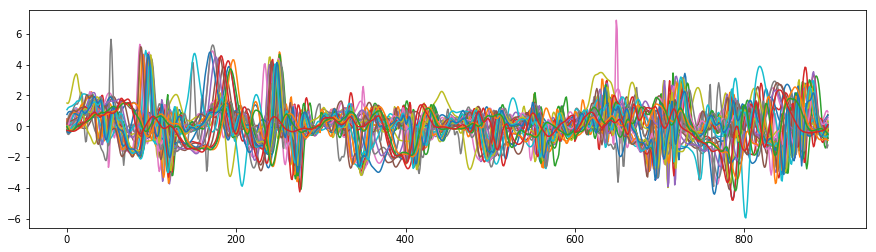

In [172]:
plt.figure(figsize=(15,4))
for row in xTe:
    plt.plot(row)

In [173]:
xTe_conv = xTe.reshape(-1, 3, 300, 1)

In [174]:
preds = model.predict(xTe_conv)

In [175]:
user_lookup[mode(preds.round().argmax(axis=1)).mode[0]]

'Frank'

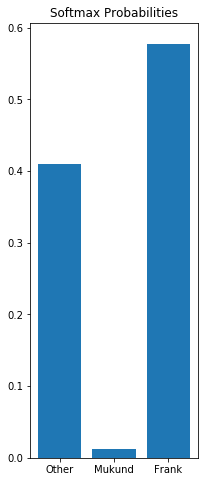

In [190]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(3)
ax.bar([0, 1, 2], preds.mean(axis=0))
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Other', 'Mukund', 'Frank'])
ax.title.set_text('Softmax Probabilities')
fig.savefig('./Data_test/results.png')
plt.show()

In [7]:
loss = np.random.rand(100)
accuracy = np.random.rand(100)
x = np.arange(100)

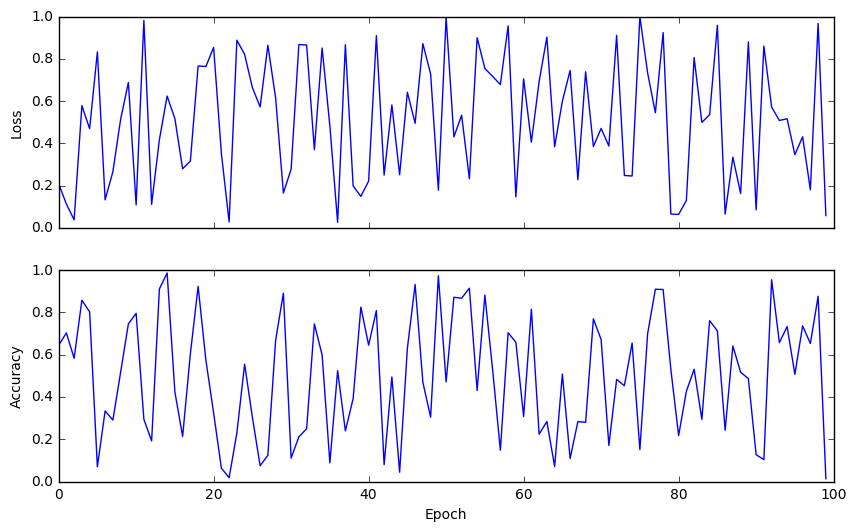

In [24]:
fig, axarr = plt.subplots(2, 1, sharex=True)
fig.set_figwidth(10)
fig.set_figheight(6)

axarr[0].plot(x, loss)
axarr[0].set_ylabel('Loss')

axarr[1].plot(x, accuracy)
axarr[1].set_xlabel('Epoch')
axarr[1].set_ylabel('Accuracy')

fig.savefig('./Data/train_results.png')

In [18]:
conf = np.random.randint(0, 10, (3,3))

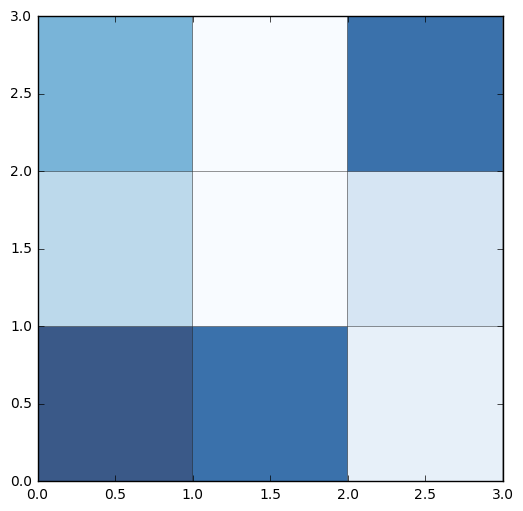

In [25]:
plt.figure(figsize=(6,6))
heatmap = plt.pcolor(conf, cmap=plt.cm.Blues, alpha=0.8, edgecolors='k')

In [26]:
plt.pcolor?

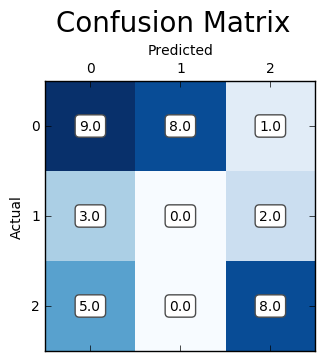

In [61]:
fig, ax = plt.subplots()
fig.suptitle('Confusion Matrix', fontsize = 20)
fig.subplots_adjust(top=0.8)
ax.matshow(conf, cmap=plt.cm.Blues)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.xaxis.set_label_position('top')

for (i, j), z in np.ndenumerate(conf):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
fig.savefig('./Data/confmat.png')

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
y = np.random.randint(0, 3, 10)
yhat = y.copy()

In [54]:
for i in range(5):
    idx = np.random.randint(0, 10)
    yhat[idx] += 1
    yhat[idx] = yhat[idx] % 3

In [59]:
confusion_matrix(y, yhat)

array([[3, 2, 0],
       [0, 2, 1],
       [2, 0, 0]])

In [60]:
for a,b in zip(y, yhat):
    print(a, b, a==b)

2 0 False
1 1 True
0 0 True
0 1 False
1 2 False
2 0 False
1 1 True
0 0 True
0 1 False
0 0 True
